In [1]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# 插值

常用于离散值的构建，如何复杂函数的近似或者平滑曲线的绘制。 最小二乘法和差值类型都是用于拟合数据，但最小二乘法是使用大量的数据来最小化损失函数，即使用的是超定方程组。但差值使用的数据量与变量的个数一直，数据量上大大小于最小二乘法。

# 多项式

在 numpy 创建多项式，如下使用方式：
```python
In [6]: p1 = P.Polynomial([1, 2, 3])
In [7]: p1
Out[7]: Polynomial([ 1., 2., 3.], [-1, 1], [-1, 1])
# 通过平方根创建
In [8]: p2 = P.Polynomial.fromroots([-1, 1])
In [9]: p2
Out[9]: Polynomial([-1., 0., 1.], [-1., 1.], [-1., 1.])
# 验证平方根
In [10]: p1.roots()
Out[10]: array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])
In [11]: p2.roots()
Out[11]: array([-1., 1.])
# 属性访问
In [12]: p1.coef
Out[12]: array([ 1., 2., 3.])
In [13]: p1.domain
Out[13]: array([-1, 1])
In [14]: p1.window
Out[14]: array([-1, 1])
# 值的计算
In [15]: p1([1.5, 2.5, 3.5])
Out[15]: array([ 10.75, 24.75, 44.75])
```

多项式的算术操作，由 $p_1 (x) = (x - 3)(x - 2)(x -1), p_2(x) = (x-2)$ 计算 $p_1 // p_2$
```python
In [16]: p1 = P.Polynomial.fromroots([1, 2, 3])
In [17]: p1
Out[17]: Polynomial([ -6., 11., -6., 1.], [-1., 1.], [-1., 1.])
In [18]: p2 = P.Polynomial.fromroots([2])
In [19]: p2
Out[19]: Polynomial([-2., 1.], [-1., 1.], [-1., 1.])
In [20]: p3 = p1 // p2
In [21]: p3
Out[21]: Polynomial([ 3., -4., 1.], [-1., 1.], [-1., 1.])
# 验证
In [22]: p3.roots()
Out[22]: array([ 1., 3.])
```

切比雪夫多项式等。
```python
In [23]: c1 = P.Chebyshev([1, 2, 3])
In [24]: c1
Out[24]: Chebyshev([ 1., 2., 3.], [-1, 1], [-1, 1])
In [25]: c1.roots()
Out[25]: array([-0.76759188, 0.43425855])
# 从根创建
In [26]: c1 = P.Chebyshev.fromroots([-1, 1])
In [27]: c1
Out[27]: Chebyshev([-0.5, 0. , 0.5], [-1., 1.], [-1., 1.])
In [28]: l1 = P.Legendre.fromroots([-1, 1])
In [29]: l1
Out[29]: Legendre([-0.66666667, 0. , 0.66666667], [-1., 1.], [-1., 1.])
# 计算
In [30]: c1([0.5, 1.5, 2.5])
Out[30]: array([-0.75, 1.25, 5.25])
In [31]: l1([0.5, 1.5, 2.5])
Out[31]: array([-0.75, 1.25, 5.25])
```

# 多项式插值

如下点：`(1,1),(2,3),(3,5),(4,4)` 可是使用 3 阶多项式（数据量减一）。即
$$
\large{
\begin{split}
f(x) = \sum_{i=1}^{4}c_ix^{i-1} = c_1x^{0} + c_2x^{1} + c_3x^{2} + c_4x^{3}
\end{split}
}
$$

In [36]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])
deg = len(x) - 1
A = P.polynomial.polyvander(x, deg)
c = linalg.solve(A, y)
c

array([ 2. , -3.5,  3. , -0.5])

In [37]:
f1 = P.Polynomial(c)
f1(2.5)

4.1874999999999982

即多项式的系数为 `[ 2. , -3.5,  3. , -0.5]`，即 $f(x)=2 - 3.5x + 3x^2 - 0.5x^3$。下面使用切比雪夫多项式：

In [38]:
A = P.chebyshev.chebvander(x, deg)
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [39]:
# 与上述有相同的结果
f2 = P.Chebyshev(c)
f2(2.5)

4.1874999999999991

使用图形展示上述两种方法

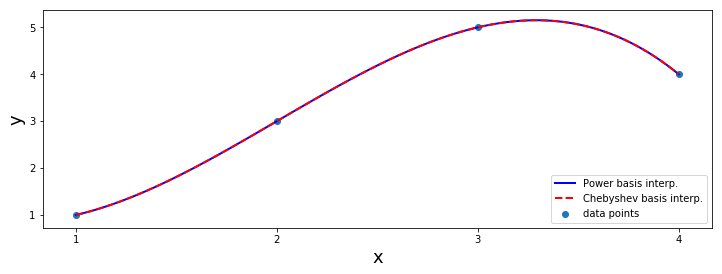

In [40]:
xx = np.linspace(x.min(), x.max(), 100) # supersampled [x[0], x[-1]] interval
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')
ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"y", fontsize=18)
ax.set_xlabel(r"x", fontsize=18)

plt.show()

更简单的方法时使用 `fit`
```python
In [46]: f1b = P.Polynomial.fit(x, y, deg)
In [47]: f1b
Out[47]: Polynomial([ 4.1875, 3.1875, -1.6875, -1.6875], [ 1., 4.], [-1., 1.])
# 切比雪夫
In [48]: f2b = P.Chebyshev.fit(x, y, deg)
In [49]: f2b
Out[49]: Chebyshev([ 3.34375 , 1.921875, -0.84375 , -0.421875], [ 1., 4.], [-1., 1.])
```

数据缩放带来的性能提升
```python
In [50]: np.linalg.cond(P.chebyshev.chebvander(x, deg))
Out[50]: 4659.7384241399586
In [51]: np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0, deg))
Out[51]: 1.8542033440472896
```

数据量带来的一些问题，以尤格函数为例$f(x)=1/(1+25x^2)$

/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/polynomial/_polybase.py:804: RankWarning: The fit may be poorly conditioned
  res = cls._fit(xnew, y, deg, w=w, rcond=rcond, full=full)


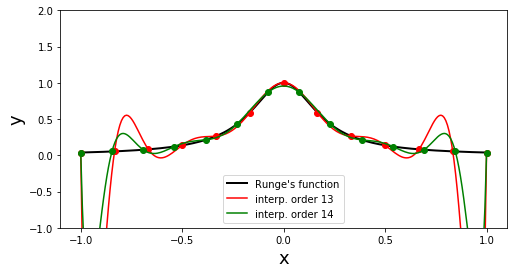

In [34]:
def runge(x):
    return 1/(1 + 25 * x**2)
def runge_interpolate(n):
    x = np.linspace(-1, 1, n)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

xx = np.linspace(-1, 1, 250)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

# 13th order interpolation of the Runge function
n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

# 14th order interpolation of the Runge function
n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.0, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"y", fontsize=18)
ax.set_xlabel(r"x", fontsize=18)

plt.show()

# 样条内插法
- [csdn - 三次样条插值法](https://blog.csdn.net/deramer1/article/details/79034201)
- [csdn - 三次样条插值](https://blog.csdn.net/skyworth0103/article/details/54292490)

![image](https://wx3.sinaimg.cn/large/69d4185bly1fyavmiowslj20ez037q30.jpg)

如上图，一共 n+1 个数据点，其中 $x_1 ~ x_{n-1}$ 成为内值点（n-1个），那么可以划分为 n 个区间，每个区间可以使用一个多项式去拟合，最常用的是三次插值进行拟合，即$f(x)=a + bx + cx^2 + dx^3$，这样每个区间会有 4 个多项式系数，那么总共多项式系数就是 4n。4n 个多项式系数通过一系列方程确认：

- 对于内值点有以下约束：
    - 在此点两侧的曲线具有连续一阶和二阶导数，那么就有 2(n-1) 个方程
    - 两侧的曲线必须通过该点，那么每个内值点会产生两个方程（将此点带入两个曲线），一共 2(n-1)个方程
    
- 起止点$x_0,x_n$ 产生 2 个方程
- 在起始点的二阶导数设置为 0 ，差生 2 个方程

那么一共就会有 4n 个方程，对应 4n 个参数。

示意图如下：
![image](https://wx1.sinaimg.cn/large/69d4185bly1fyawpb9uffj20dw0a1t9a.jpg)

使用样条插值来求解尤格函数。

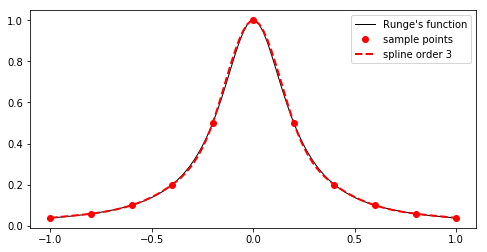

In [30]:
x = np.linspace(-1, 1, 11)
# 尤格函数
y = runge(x)
# 样条插值，使用三阶多项式
f_i = interpolate.interp1d(x, y, kind=3)
xx = np.linspace(-1, 1, 100)

# 绘图
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f_i(xx), 'r--', lw=2, label='spline order 3')
ax.legend()
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
plt.show()

通常来说使用 3 阶多项式是比较好的选择，下面以$(0,3), (1, 4), (2, 3.5), (4, 2), (5, 1.5), (6, 1.25),(7, 0.7)$ 为例，看看不同阶多项式的效果。

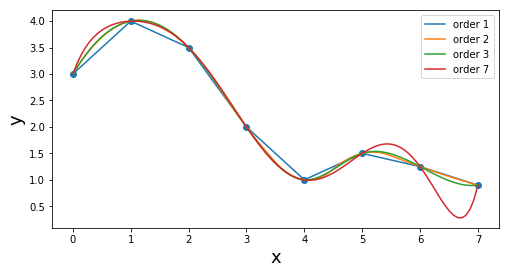

In [33]:
x= np.array([0, 1, 2, 3, 4, 5, 6, 7])
y= np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)

for n in [1, 2, 3, 7]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)

ax.legend()
ax.set_ylabel(r"y", fontsize=18)
ax.set_xlabel(r"x", fontsize=18)
plt.show()

# 多变量插值

上面使用的方法可以返回到多维，如$f(x,y)=exp\left(-(x+1/2)^2 - 2(y + 1/2)^2\right) - exp\left(-(x-1/2)^2-2(y-1/2)^2\right)$

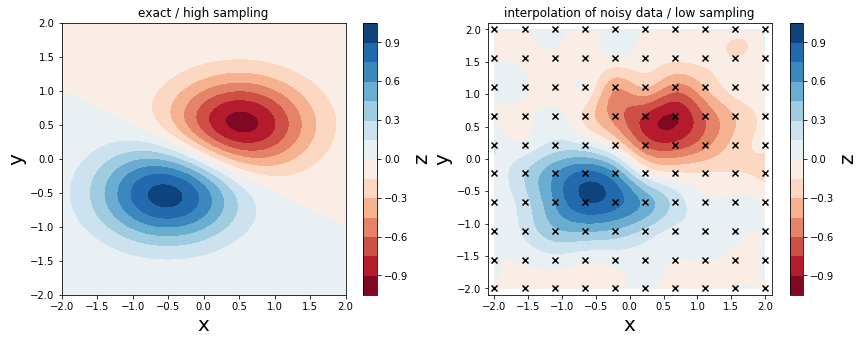

In [43]:
x = y = np.linspace(-2, 2, 10)
def f(x, y):
    return np.exp(-(x + .5)**2 - 2*(y + .5)**2) - np.exp(-(x - .5)**2 - 2*(y - .5)**2)

X, Y = np.meshgrid(x, y)
# simulate noisy data at fixed grid points X, Y
Z = f(X, Y) + 0.05 * np.random.randn(*X.shape)

# 插值
f_i = interpolate.interp2d(x, y, Z, kind='cubic')
xx = yy = np.linspace(x.min(), x.max(), 100)
ZZi = f_i(xx, yy)
XX, YY = np.meshgrid(xx, yy)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# for reference, first plot the contours of the exact function
c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"x", fontsize=20)
axes[0].set_ylabel(r"y", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"z", fontsize=20)

# next, plot the contours of the supersampled interpolation of the noisy data
c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"x", fontsize=20)
axes[1].set_ylabel(r"y", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"z", fontsize=20)

plt.show()

非规则坐标网格，以 $f(x,y)=exp(-x^2 - y^2)\cos 4x \sin6y$ 为例。

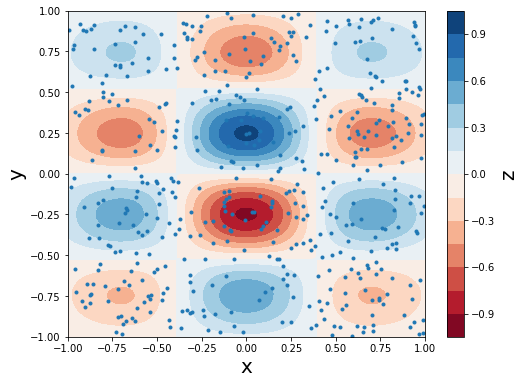

In [45]:
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)

# 随机采集样本点
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘图
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"x", fontsize=20)
ax.set_ylabel(r"y", fontsize=20)
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"z", fontsize=20)

对比不同的插值方法

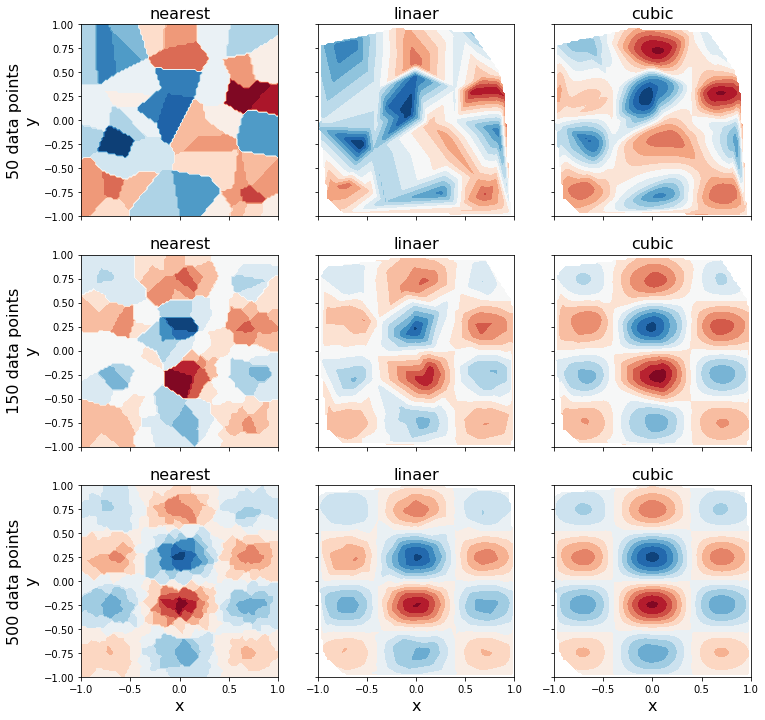

In [46]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

# 样本点数量
n_vec = [50, 150, 500]
for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linaer", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)
    
for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)